**practising simple and multiple regression on stack overflow survey data**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:

dataset = pd.read_csv('/content/survey_results_public.csv')

In [87]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [89]:
dataset.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [91]:
df = dataset[['Age','ConvertedComp']]
print(df)

        Age  ConvertedComp
0      14.0            NaN
1      19.0            NaN
2      28.0         8820.0
3      22.0        61000.0
4      30.0            NaN
...     ...            ...
88878   NaN            NaN
88879   NaN            NaN
88880   NaN            NaN
88881   NaN            NaN
88882  18.0            NaN

[88883 rows x 2 columns]


In [94]:
df.rename(columns = {'ConvertedComp':'Salaries'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [98]:
empty_filt = (df['Salaries'] == np.nan)
df

,Age,Salaries
0,14.0,NaN
1,19.0,NaN
2,28.0,8820.0
3,22.0,61000.0
4,30.0,NaN
...,...,...
88878,NaN,NaN
88879,NaN,NaN
88880,NaN,NaN
88881,NaN,NaN


In [104]:
df = df.dropna(axis = 'index', subset = ['Salaries'])

In [105]:
df

,Age,Salaries
2,28.0,8820.0
3,22.0,61000.0
5,28.0,366420.0
8,23.0,95179.0
9,NaN,13293.0
...,...,...
88325,26.0,130000.0
88326,34.0,82488.0
88328,37.0,68745.0
88329,NaN,588012.0


In [107]:
X = df['Age'].values
y = df['Salaries'].values

In [112]:
X = X.reshape(-1,1)

In [109]:
print(y)

[  8820.  61000. 366420. ...  68745. 588012.  22915.]


In [113]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X) 

In [114]:
print(X)

[[28.        ]
 [22.        ]
 [28.        ]
 ...
 [37.        ]
 [31.42631136]
 [33.        ]]


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 1)

In [123]:
print(X_train[0:10])

[[27.]
 [34.]
 [23.]
 [30.]
 [36.]
 [25.]
 [31.]
 [27.]
 [43.]
 [24.]]


In [117]:
print(y_train)

[  22056.   71609.   23376. ... 1000000.  217590.   11688.]


In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
np.set_printoptions(precision = 2)

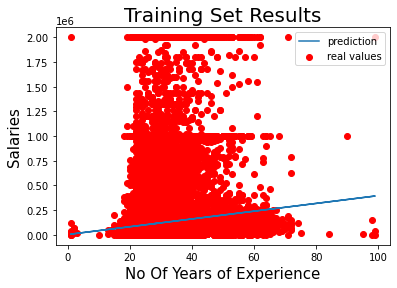

In [126]:
plt.scatter(X_train,y_train, color = 'red', label = 'real values')
plt.plot(X_train, regressor.predict(X_train), label = 'prediction')
plt.xlabel('No Of Years of Experience', fontdict = {'fontsize':15})
plt.ylabel('Salaries', fontdict = {'fontsize':15})
plt.title('Training Set Results',fontdict = {'fontsize':20})
plt.legend()
plt.show()

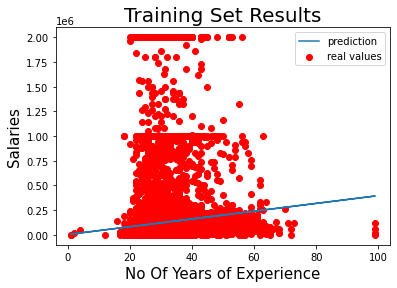

In [127]:
plt.scatter(X_test,y_test, color = 'red', label = 'real values')
plt.plot(X_test, regressor.predict(X_test), label = 'prediction')
plt.xlabel('No Of Years of Experience', fontdict = {'fontsize':15})
plt.ylabel('Salaries', fontdict = {'fontsize':15})
plt.title('Training Set Results',fontdict = {'fontsize':20})
plt.legend()
plt.show()

In [131]:
import pandas as pd

my_dict = {
    'names':['BEAS','PANDA','HITEN','RAHUL'],
    'students':[3,2,20,18]
}

my_dict = pd.DataFrame(my_dict)

In [132]:
my_dict

,names,students
0,BEAS,3
1,PANDA,2
2,HITEN,20
3,RAHUL,18


In [133]:
A = pd.Series(data = [34,45,55,40])

In [135]:
print(A > 45)

0    False
1    False
2     True
3    False
dtype: bool
